# Load modules and data

## Modules

In [1]:
# import usefull modules
import numpy as np  # for numpy array
import pandas as pd  # for data aggration and some basic plots
import matplotlib.pyplot as plt  # specific for plot function
############### modeling modules#########################
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import zero_one_loss
################# geo data modules################

import geopandas as gpd


## Load data

In [2]:
stands = pd.read_csv("standsNK_BRT.csv")
# have a glance of the data first
stands.describe()

,Unnamed: 0,poly_ID,dam_year,storm,snow,altitude,fertilityc,soiltype,developmentc,mainsp,dam_G,dam_H,dam_D,dam_ratioHD,dam_age
count,321210.000000,321210.000000,321210.000000,321210.000000,321210.00000,321210.000000,321210.000000,321210.000000,321210.000000,321210.000000,321210.000000,321210.000000,321210.000000,321210.000000,321210.000000
mean,160613.090112,366583.416992,2017.222745,0.017310,0.01533,138.794611,3.192528,22.082666,7.050347,1.704816,21.260723,15.555151,18.293795,85.469273,55.310780
std,92730.278599,198966.395978,3.298688,0.130422,0.12286,40.006502,0.876955,19.460878,0.888257,1.242895,4.215813,2.806543,3.626168,4.290129,15.490390
min,1.000000,1.000000,2012.000000,0.000000,0.00000,0.000000,1.000000,10.000000,1.000000,1.000000,0.018182,0.027273,0.027273,64.131737,0.313636
25%,80307.250000,195782.750000,2014.000000,0.000000,0.00000,105.000000,3.000000,10.000000,7.000000,1.000000,18.900000,14.026990,16.285714,83.016098,44.000000
50%,160612.500000,382987.500000,2017.000000,0.000000,0.00000,133.757735,3.000000,10.000000,7.000000,1.000000,21.555556,15.700000,18.452468,84.613362,55.100000
75%,240919.750000,536264.750000,2020.000000,0.000000,0.00000,166.522135,4.000000,21.000000,8.000000,2.000000,24.123762,17.265995,20.440000,86.680335,65.972973
max,321228.000000,695774.000000,2023.000000,1.000000,1.00000,310.307767,10.000000,90.000000,11.000000,27.000000,36.000000,27.868254,34.412698,360.000000,174.000000


In [3]:
stands.head()  # check first 5 rows

,Unnamed: 0,poly_ID,dam_year,storm,snow,altitude,fertilityc,soiltype,developmentc,mainsp,dam_G,dam_H,dam_D,dam_ratioHD,dam_age
0,1,1,2022,0,0,75.912500,1,10,7,3,18.176471,19.782353,20.411765,96.916427,40.705882
1,2,2,2020,0,0,81.607692,2,70,7,3,20.156250,17.093750,16.437500,103.992395,33.281250
2,3,3,2020,0,0,82.820000,2,10,7,3,20.769231,18.297436,18.871795,96.956522,37.333333
3,4,4,2018,0,0,87.025899,2,10,7,3,21.206395,19.579942,21.398256,91.502513,46.122093
4,5,5,2016,0,0,87.733846,2,10,7,3,17.401302,16.726247,17.117137,97.716386,32.498915


### aggrate the data based on different classes

In [4]:
# 1. based on developmentc to check the number of observations
stands[['storm', "developmentc"]].groupby(
    ["developmentc", "storm"]).value_counts()

developmentc  storm
1             0            86
              1             4
2             0           528
              1            33
3             0           720
              1             4
4             0          1928
              1            13
5             0          5443
              1            19
6             0         65409
              1           679
7             0        142552
              1          3382
8             0         96626
              1          1375
9             0            83
              1             3
10            0          2173
              1            44
11            0           102
              1             4
dtype: int64

## plot somethings

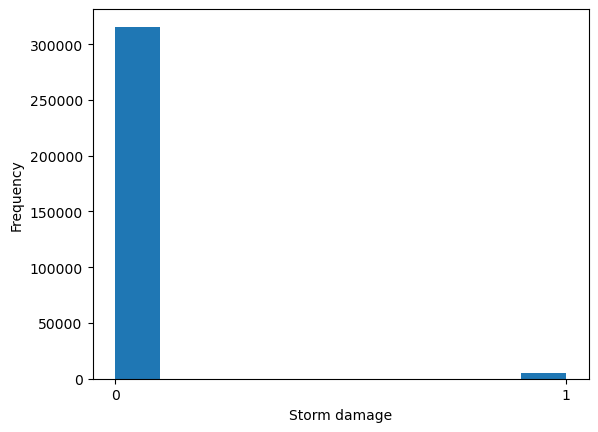

In [5]:
# strom frequency
stands['storm'].plot.hist()
plt.xticks([0, 1])
plt.xlabel('Storm damage')
plt.show()

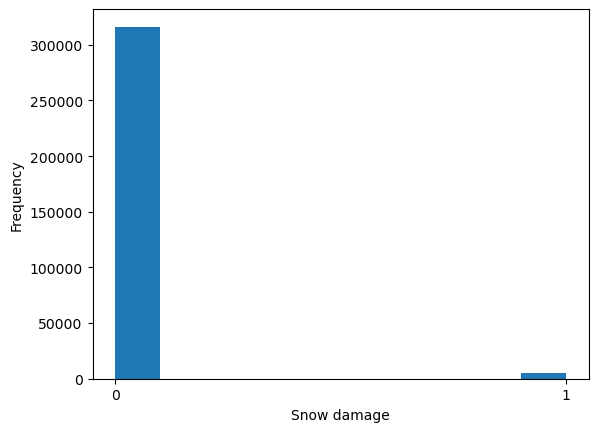

In [6]:
# wind damage frequency
stands['snow'].plot.hist()
plt.xticks([0, 1])
plt.xlabel('Snow damage')
plt.show()

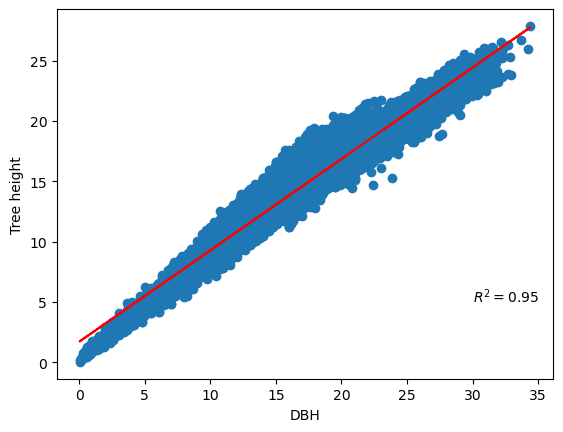

In [7]:
# to show the relationship between two variables, here Diameter and height
x = stands['dam_D'].values
y = stands['dam_H'].values
# fit a linear
# Calculate coefficients
coefficients = np.polyfit(x, y, 1)

# Create line of best fit
line = np.poly1d(coefficients)

# Plot scatter plot and line of best fit
plt.scatter(x, y)
plt.plot(x, line(x), color='red')

plt.text(30, 5, r'$R^{2} = 0.95$')
plt.xlabel("DBH")
plt.ylabel("Tree height")
plt.show()

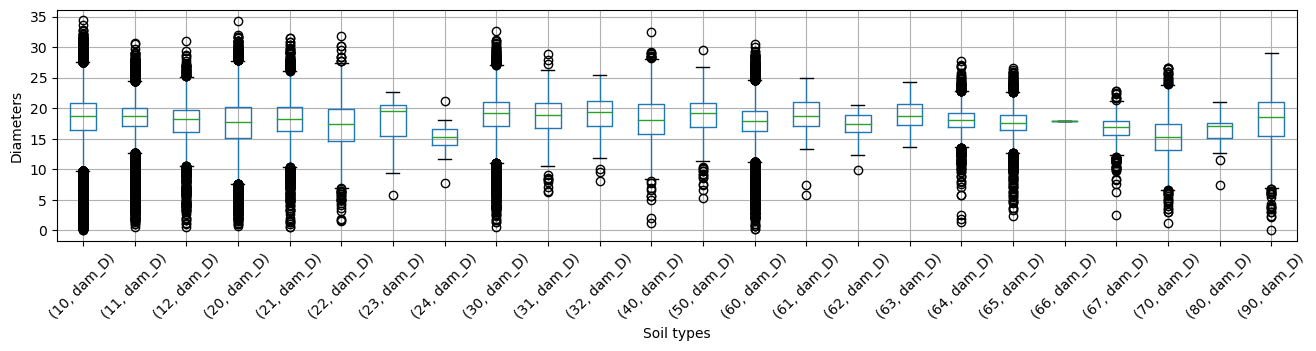

In [8]:
stands[['soiltype', 'dam_D']].groupby('soiltype').boxplot(
    column='dam_D',
    subplots=False,
    rot=45,
    figsize=(16, 3))
plt.xlabel("Soil types")
plt.ylabel("Diameters")
plt.show()

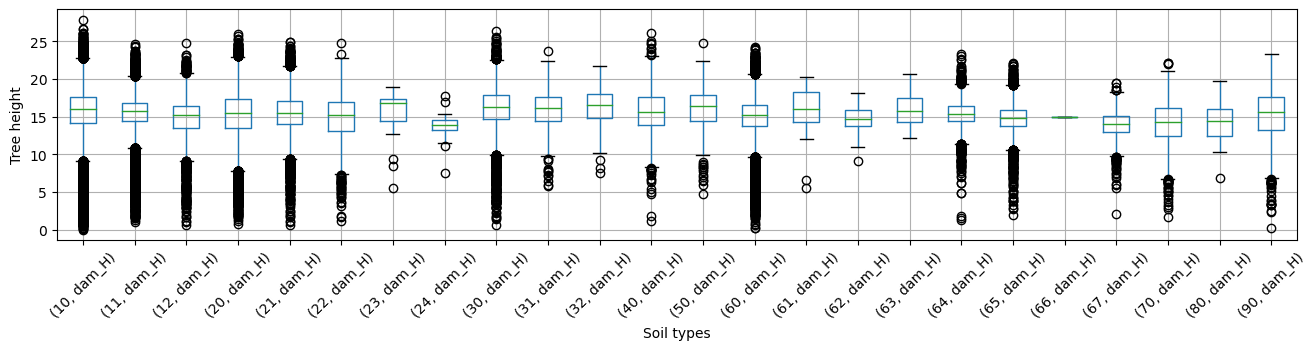

In [9]:
stands[['soiltype', 'dam_H']].groupby(
    'soiltype').boxplot(column='dam_H', 
                        subplots=False, 
                        rot=45, figsize=(16, 3))
plt.xlabel("Soil types")
plt.ylabel("Tree height")
plt.show()

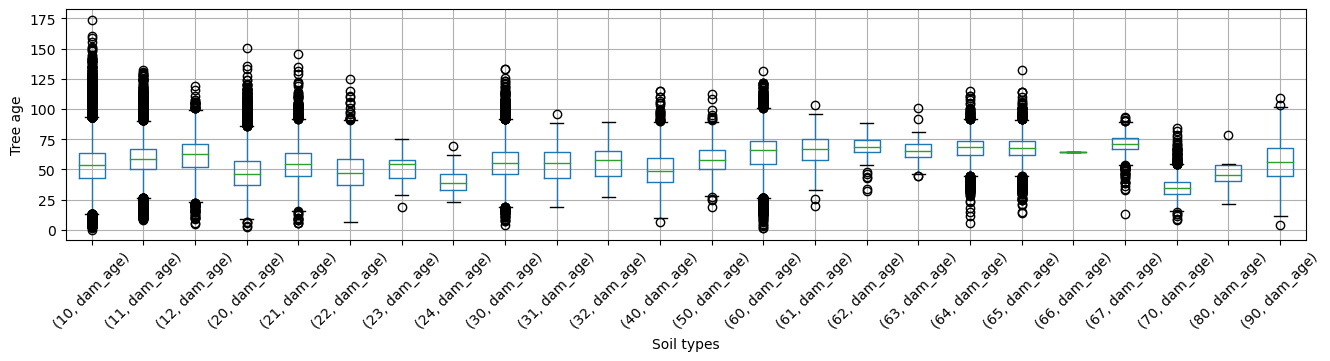

In [10]:
stands[['soiltype', 'dam_age']].groupby(
    'soiltype').boxplot(column='dam_age',
                        subplots=False,
                        rot=45,
                        figsize=(16, 3))
plt.xlabel("Soil types")
plt.ylabel("Tree age")
plt.show()

# Modeling

we first print out all columnes of the stands data. Becasue:

- To remove the useless columnes, for example, *'Unnamed: 0'*.
- To specify which columns are with category or numerical.
- To split X and y.

In [60]:
# print out all columns
stands.columns

Index(['Unnamed: 0', 'poly_ID', 'dam_year', 'storm', 'snow', 'altitude',
       'fertilityc', 'soiltype', 'developmentc', 'mainsp', 'dam_G', 'dam_H',
       'dam_D', 'dam_ratioHD', 'dam_age'],
      dtype='object')

For **X** dataset, which is used as *predictors*, we only keep those variable used to be predictors.

In [11]:
X = stands.drop(columns=['storm', 'Unnamed: 0',
                         'poly_ID', 'dam_year', 'snow'])
categorical_features = ['fertilityc', 'soiltype', 'developmentc', 'mainsp']
enc = OrdinalEncoder()  # to tell sklearn therr are caterogical variables
X[categorical_features] = enc.fit_transform(
    X[categorical_features])  # encoding caterory variables

y1 = stands['storm'].astype('category')
y2 = stands['snow'].astype('category')

Before we continue, we have to solve the imbalance problem. As you alrealy see the class form *storm* and *snow* columns, the class marked with *1*, which means damage happend, is much more the case of *0*.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y1, test_size=0.25, random_state=42, stratify=y1, shuffle=True)

Here we check the sampling resluts before we solve the imbalance problem

In [13]:
y_train.value_counts()

0    236737
1      4170
Name: storm, dtype: int64

In [14]:
y_test.value_counts()

0    78913
1     1390
Name: storm, dtype: int64

In [15]:
# creat a gbm model
gbm = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=0.1,
                                 subsample=1)


gbm.fit(X_train, y_train)

print("Accuracy score (training): {0:.3f}".format(
    gbm.score(X_train, y_train)))

Accuracy score (training): 0.983


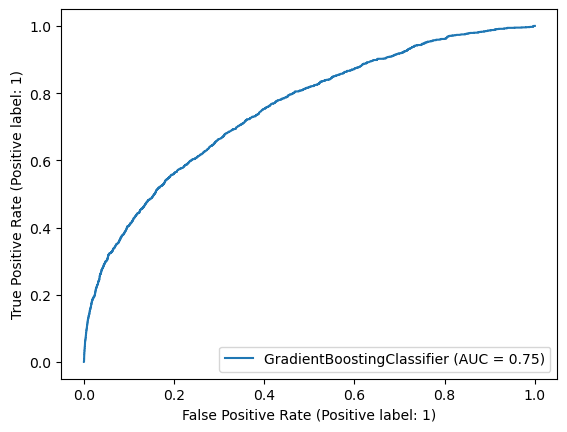

In [16]:
# ROC CURVE
RocCurveDisplay.from_estimator(gbm, X_test, y_test)
plt.show()

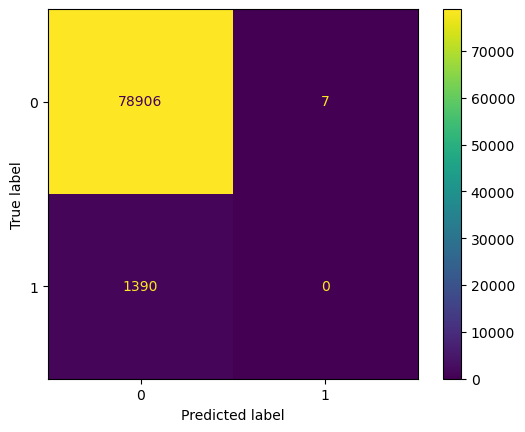

In [18]:
predictions = gbm.predict(X_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix(
    y_test, predictions), display_labels=[0, 1])

cm_display.plot()
plt.show()

The above model has some problems:

- overfitting
- can not detect the **'0'** class

So, we have to solve the imbalance issue.

In [19]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [20]:
y_res.value_counts()

0    236737
1    236737
Name: storm, dtype: int64

In [21]:
# create a gbm model

gbm = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=0.1,
                                 subsample=1)

gbm.fit(X_res, y_res)

print("Accuracy score (training): {0:.3f}".format(
    gbm.score(X_res, y_res)))

Accuracy score (training): 0.719


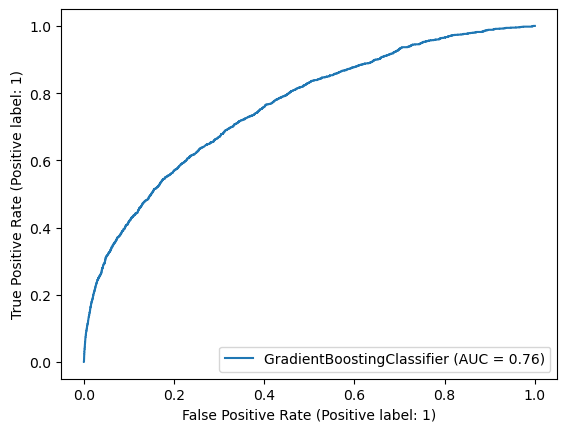

In [22]:
# ROC CURVE
RocCurveDisplay.from_estimator(gbm, X_test, y_test)
plt.show()

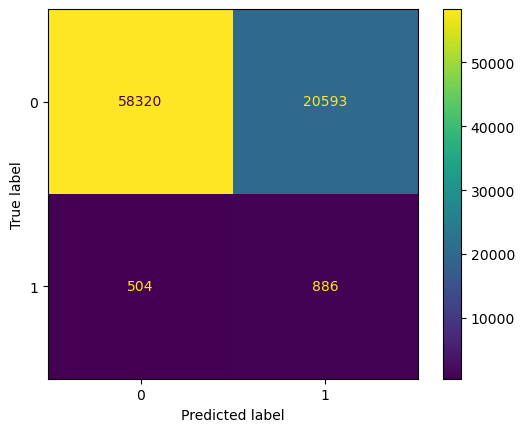

In [23]:
predictions = gbm.predict(X_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix(
    y_test, predictions), display_labels=[0, 1])

cm_display.plot()
plt.show()

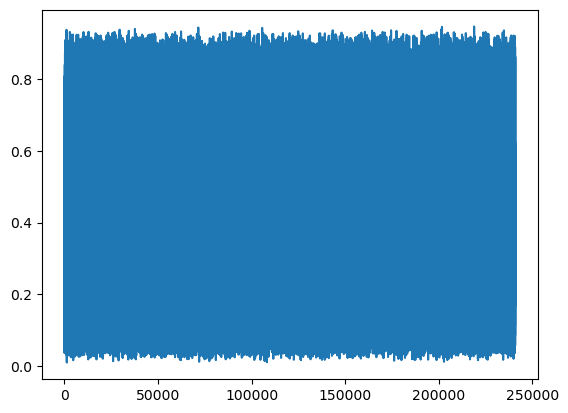

In [24]:
# positive cases, for example, 1
y_pred_proba = gbm.predict_proba(X_train)[::, 1]
plt.plot(y_pred_proba)
plt.show()

We would like to check how parameter setting will affect model performance, for example:
- n_estimators

In [25]:

def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [1, 20, 40, 60, 80, 100, 120, 200,250,300,350,400,500]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n,
                                                    learning_rate=0.1,
                                                    subsample=1)
    return models


'''
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
'''

"\ndef evaluate_model(model, X, y):\n    # define the evaluation procedure\n    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\n    # evaluate the model and collect the results\n    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)\n    return scores\n"

>----- 1 0.630
>----- 20 0.684
>----- 40 0.699
>----- 60 0.709
>----- 80 0.716
>----- 100 0.719
>----- 120 0.724
>----- 200 0.735
>----- 250 0.741
>----- 300 0.749
>----- 350 0.754
>----- 400 0.760
>----- 500 0.772


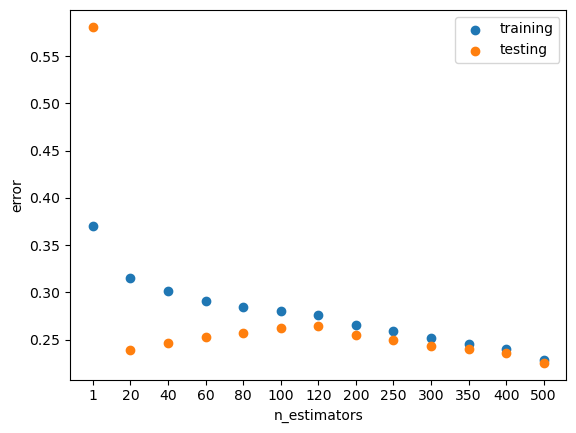

In [26]:


models = get_models()

results, names, errors, errors1 = list(), list(), list(), list()
for name, model in models.items():
    # evaluate the model
    # scores = evaluate_model(model, X_res, y_res)
    model = model.fit(X_res, y_res)
    predictions = model.predict(X_res)
    predictions1 = model.predict(X_test)
    scores = accuracy_score(y_res, predictions)
    scores1 = accuracy_score(y_test, predictions1)
    error = 1 - scores
    errors.append(error)
    errors1.append(1 - scores1)
    # store the results
   # results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>----- %s %.3f' %
          (name, np.mean(scores)))

#################### plot######################
plt.scatter(names, errors, label="training")
plt.scatter(names, errors1, label="testing")
plt.xlabel("n_estimators")
plt.ylabel("error")
plt.legend()
plt.show()

In [27]:
gbm = GradientBoostingClassifier(n_estimators=1000,
                                 learning_rate=0.1,
                                 subsample=1)

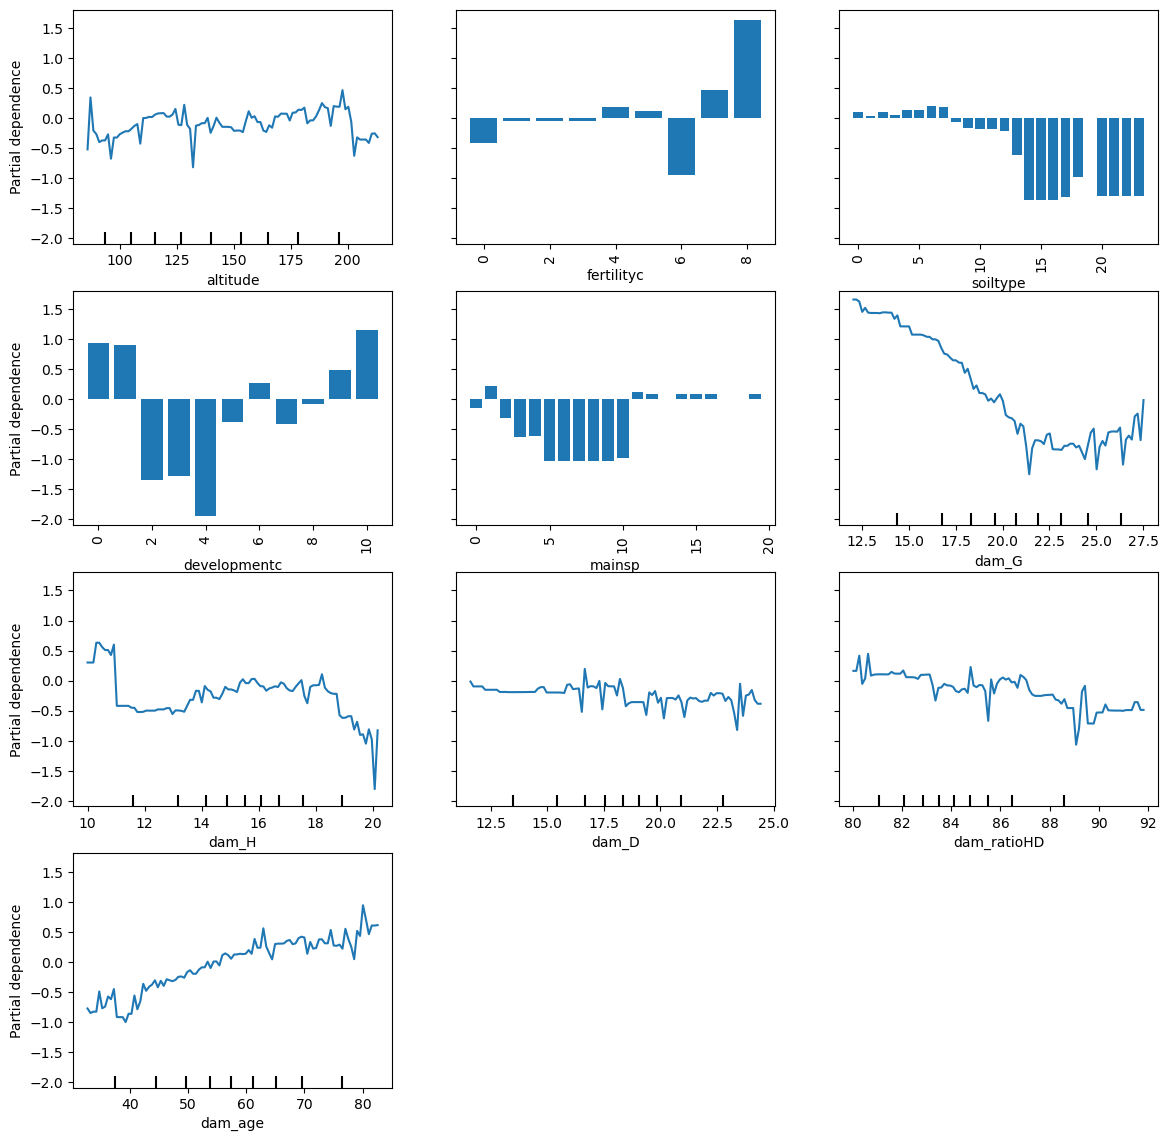

In [28]:

features_info = {
    # features of interest
    "features": ['altitude', 'fertilityc', 'soiltype', 'developmentc', 'mainsp', 'dam_G',
                 'dam_H', 'dam_D', 'dam_ratioHD', 'dam_age'],
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
    "categorical_features": ['fertilityc', 'soiltype', 'developmentc', 'mainsp'],
}
##### PLOT ######
fig, ax = plt.subplots(figsize=(14, 14))
PartialDependenceDisplay.from_estimator(
    gbm.fit(X_res, y_res),
    X_res,
    target=1, n_jobs=4,
    **features_info,
    ax=ax
)
plt.show()

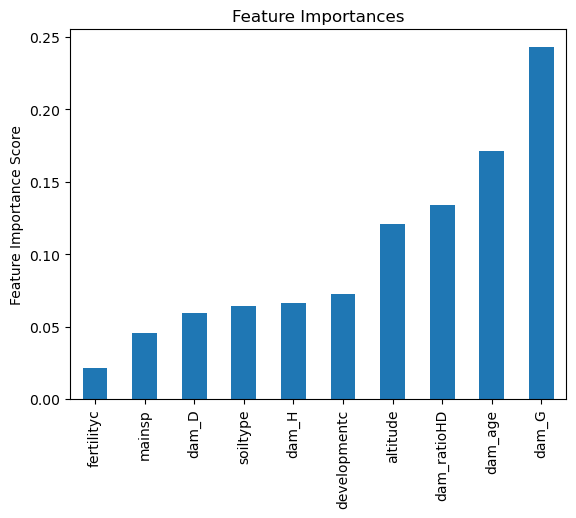

In [29]:
# variable importance
feat_imp = pd.Series(gbm.feature_importances_,
                     index=X_res.columns).sort_values(ascending=True)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

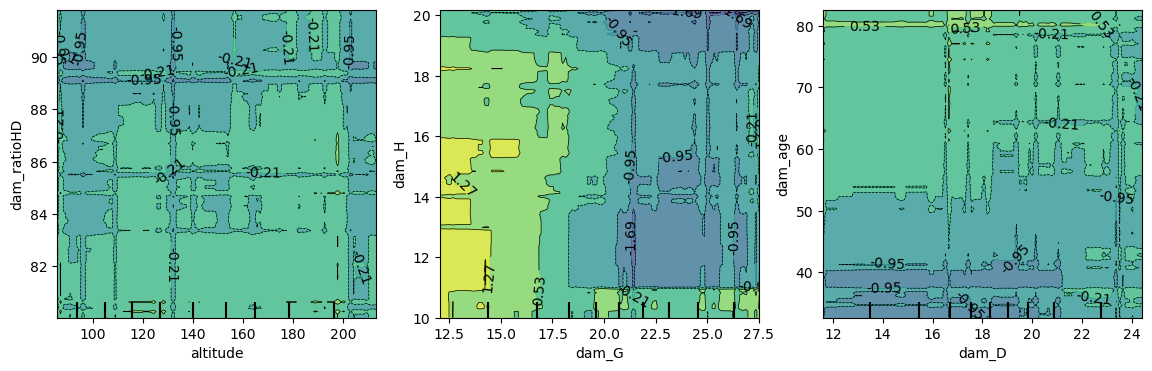

In [30]:
# 'fertilityc', 'soiltype', 'developmentc', 'mainsp',
features_info = {
    # features of interest
    "features": [('altitude', 'dam_ratioHD'), ('dam_G', 'dam_H'), ('dam_D', 'dam_age')],
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
    "categorical_features": ['fertilityc', 'soiltype', 'developmentc', 'mainsp'],
}
##### PLOT ######
fig, ax = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(
    gbm.fit(X_res, y_res),
    X_res,
    target=1, n_jobs=4,
    **features_info,
    ax=ax
)
plt.show()

## plot results

In [31]:
# First, we add results to train data and test data
y_pred_proba1 = gbm.predict_proba(X_train)[::, 1]
y_pred_proba2 = gbm.predict_proba(X_test)[::, 1]

X_train['probability'] = y_pred_proba1
X_test['probability'] = y_pred_proba2

final_data = pd.concat([X_train, X_test])
final_data.head()

,altitude,fertilityc,soiltype,developmentc,mainsp,dam_G,dam_H,dam_D,dam_ratioHD,dam_age,probability
54557,119.976923,1.0,3.0,7.0,1.0,25.350877,20.557895,24.859649,82.695836,61.526316,0.524381
202626,136.913750,3.0,0.0,6.0,0.0,21.360000,17.396500,20.065000,86.700723,62.935000,0.568255
298025,165.829545,2.0,3.0,6.0,3.0,22.185714,13.412857,15.485714,86.614391,49.128571,0.206372
197964,113.274074,2.0,0.0,7.0,0.0,23.359375,17.301562,21.515625,80.413943,76.625000,0.318175
238133,188.690769,2.0,0.0,6.0,1.0,22.560510,13.834395,15.872611,87.158909,45.337580,0.682278


In [32]:
final_data

,altitude,fertilityc,soiltype,developmentc,mainsp,dam_G,dam_H,dam_D,dam_ratioHD,dam_age,probability
54557,119.976923,1.0,3.0,7.0,1.0,25.350877,20.557895,24.859649,82.695836,61.526316,0.524381
202626,136.913750,3.0,0.0,6.0,0.0,21.360000,17.396500,20.065000,86.700723,62.935000,0.568255
298025,165.829545,2.0,3.0,6.0,3.0,22.185714,13.412857,15.485714,86.614391,49.128571,0.206372
197964,113.274074,2.0,0.0,7.0,0.0,23.359375,17.301562,21.515625,80.413943,76.625000,0.318175
238133,188.690769,2.0,0.0,6.0,1.0,22.560510,13.834395,15.872611,87.158909,45.337580,0.682278
...,...,...,...,...,...,...,...,...,...,...,...
297281,175.000000,4.0,2.0,7.0,0.0,18.666667,15.233333,18.000000,84.629630,67.333333,0.547998
247345,193.333333,2.0,4.0,6.0,3.0,22.461538,15.638462,18.307692,85.420168,58.384615,0.545017
16829,112.500000,2.0,0.0,5.0,0.0,19.769231,12.346154,14.461538,85.372340,35.076923,0.042905
6360,143.520833,1.0,0.0,5.0,2.0,19.618182,13.378182,14.890909,89.841270,35.036364,0.027672


In [33]:
stands[['poly_ID']]

,poly_ID
0,1
1,2
2,3
3,4
4,5
...,...
321205,695770
321206,695771
321207,695772
321208,695773


In [34]:
# we could merge the 2 dataframes by index
final_data = pd.merge(
    final_data, stands[['poly_ID']], left_index=True, right_index=True)
final_data.head()

,altitude,fertilityc,soiltype,developmentc,mainsp,dam_G,dam_H,dam_D,dam_ratioHD,dam_age,probability,poly_ID
54557,119.976923,1.0,3.0,7.0,1.0,25.350877,20.557895,24.859649,82.695836,61.526316,0.524381,133045
202626,136.913750,3.0,0.0,6.0,0.0,21.360000,17.396500,20.065000,86.700723,62.935000,0.568255,464233
298025,165.829545,2.0,3.0,6.0,3.0,22.185714,13.412857,15.485714,86.614391,49.128571,0.206372,650388
197964,113.274074,2.0,0.0,7.0,0.0,23.359375,17.301562,21.515625,80.413943,76.625000,0.318175,456627
238133,188.690769,2.0,0.0,6.0,1.0,22.560510,13.834395,15.872611,87.158909,45.337580,0.682278,531091


### load shp file 

In [35]:
my_polygon = gpd.read_file("polygons_BRT.shp")
my_polygon.head()

,poly_ID,id,objectd,forstsd,stndnmb,area,maingrp,subgrop,dvlpmnt,mainsp,...,snow,altitud,frtltyc,soiltyp,dam_G,dam_H,dam_D,dm_rtHD,dam_age,geometry
0,1.0,1.0,24038741.0,1-2022-37461,2.0,0.42,0.0,0.0,7.0,3.0,...,0,75.912500,1,10,18.176471,19.782353,20.411765,96.916427,40.705882,"POLYGON ((630752.834 6881987.809, 630752.832 6..."
1,2.0,2.0,21929129.0,1-2020-27317,8.0,0.81,0.0,0.0,7.0,3.0,...,0,81.607692,2,70,20.156250,17.093750,16.437500,103.992395,33.281250,"POLYGON ((630895.994 6881992.743, 630895.993 6..."
2,3.0,3.0,21929128.0,1-2020-27317,10.0,0.99,0.0,0.0,7.0,3.0,...,0,82.820000,2,10,20.769231,18.297436,18.871795,96.956522,37.333333,"POLYGON ((630969.000 6881931.399, 630969.370 6..."
3,4.0,4.0,19963574.0,1-2018-86789,458.0,12.00,1.0,1.0,7.0,3.0,...,0,87.025899,2,10,21.206395,19.579942,21.398256,91.502513,46.122093,"POLYGON ((631188.574 6881609.752, 631248.357 6..."
4,5.0,5.0,17613756.0,1-2016-47628,458.0,12.10,1.0,1.0,7.0,3.0,...,0,87.733846,2,10,17.401302,16.726247,17.117137,97.716386,32.498915,"POLYGON ((631188.574 6881609.752, 631248.357 6..."


In [36]:
print(my_polygon.poly_ID.dtype)
print(final_data.poly_ID.dtype)

float64
int64


In [37]:
# we shoule keep the key as the same data type

final_data = final_data.astype({"poly_ID": float})
print(final_data.poly_ID.dtype)

float64


In [38]:
# NOW we merge pandas dataframe to geopandas dataframe based on 'poly_ID'

df = my_polygon.merge(final_data, on='poly_ID', how='left')
NewGeoData = gpd.GeoDataFrame(df)
NewGeoData .head()

,poly_ID,id,objectd,forstsd,stndnmb,area,maingrp,subgrop,dvlpmnt,mainsp_x,...,fertilityc,soiltype,developmentc,mainsp_y,dam_G_y,dam_H_y,dam_D_y,dam_ratioHD,dam_age_y,probability
0,1.0,1.0,24038741.0,1-2022-37461,2.0,0.42,0.0,0.0,7.0,3.0,...,0.0,0.0,6.0,2.0,18.176471,19.782353,20.411765,96.916427,40.705882,0.024954
1,2.0,2.0,21929129.0,1-2020-27317,8.0,0.81,0.0,0.0,7.0,3.0,...,1.0,21.0,6.0,2.0,20.156250,17.093750,16.437500,103.992395,33.281250,0.038801
2,3.0,3.0,21929128.0,1-2020-27317,10.0,0.99,0.0,0.0,7.0,3.0,...,1.0,0.0,6.0,2.0,20.769231,18.297436,18.871795,96.956522,37.333333,0.191222
3,4.0,4.0,19963574.0,1-2018-86789,458.0,12.00,1.0,1.0,7.0,3.0,...,1.0,0.0,6.0,2.0,21.206395,19.579942,21.398256,91.502513,46.122093,0.093043
4,5.0,5.0,17613756.0,1-2016-47628,458.0,12.10,1.0,1.0,7.0,3.0,...,1.0,0.0,6.0,2.0,17.401302,16.726247,17.117137,97.716386,32.498915,0.193517


In [39]:
NewGeoData.geometry

0         POLYGON ((630752.834 6881987.809, 630752.832 6...
1         POLYGON ((630895.994 6881992.743, 630895.993 6...
2         POLYGON ((630969.000 6881931.399, 630969.370 6...
3         POLYGON ((631188.574 6881609.752, 631248.357 6...
4         POLYGON ((631188.574 6881609.752, 631248.357 6...
                                ...                        
321205    POLYGON ((591782.253 6933383.840, 591784.260 6...
321206    POLYGON ((591561.986 6933338.591, 591567.002 6...
321207    POLYGON ((591649.845 6933571.334, 591639.674 6...
321208    POLYGON ((666163.435 6872795.368, 666141.062 6...
321209    POLYGON ((666229.141 6872861.924, 666295.261 6...
Name: geometry, Length: 321210, dtype: geometry

In [40]:
NewGeoData['geometry'] = NewGeoData['geometry'].to_crs(epsg=4326)  # To WGS84
NewGeoData.geometry

0         POLYGON ((29.50070 62.04746, 29.50070 62.04746...
1         POLYGON ((29.50344 62.04745, 29.50344 62.04745...
2         POLYGON ((29.50479 62.04687, 29.50480 62.04688...
3         POLYGON ((29.50874 62.04391, 29.50997 62.04488...
4         POLYGON ((29.50874 62.04391, 29.50997 62.04488...
                                ...                        
321205    POLYGON ((28.78296 62.52005, 28.78299 62.52000...
321206    POLYGON ((28.77866 62.51970, 28.77875 62.51968...
321207    POLYGON ((28.78049 62.52177, 28.78028 62.52161...
321208    POLYGON ((30.16826 61.95116, 30.16785 61.95123...
321209    POLYGON ((30.16958 61.95173, 30.17086 61.95193...
Name: geometry, Length: 321210, dtype: geometry

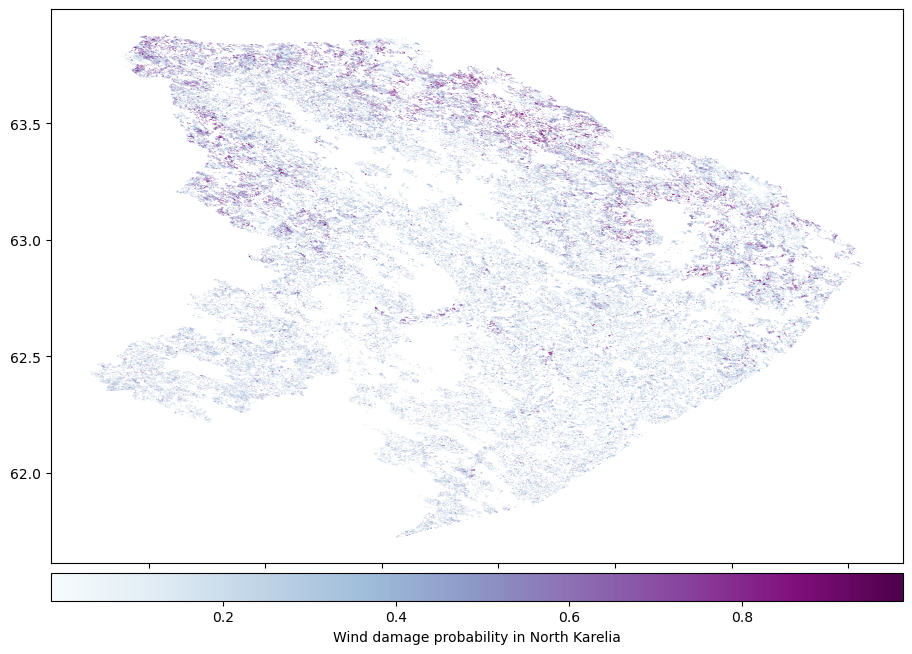

In [69]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# color map
original_cmap = 'BuPu'

# Reverse the colormap
# reversed_cmap = matplotlib.colormaps.get_cmap(original_cmap).reversed()
# add color
fig, ax = plt.subplots(1, 1,figsize=(9,6),layout="constrained")
divider = make_axes_locatable(ax)

cax = divider.append_axes("bottom", size="5%", pad=0.1)

NewGeoData.plot(column='probability', cmap=original_cmap,
                legend=True,ax=ax,cax=cax,
                legend_kwds={"label": "Wind damage probability in North Karelia", "orientation": "horizontal"}
                )
plt.show()